In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import date

# Project Aim
The aim of my project is to predict stem salaries  using numerous classifiers including  a combination of a number of classifeirs and report the optimal classifer. 
### Data Information
This data was gotten from the kaggle website.
It contains 62,642 STEM salaries records including useful information such as company,job title, experience and more.
### Classifiers Used 
- Decision Tree 
- Support Vector Machine(SVM)
- Naive Bayes(NB)
- Random Forest Classifer 
- K Nearest Neighbors(KNN)



# Importing Data 
Below shows the first few rows of the data
There is a total of 29 columns

In [299]:
# import data
df = pd.read_csv('Levels_Fyi_Salary_Data.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [300]:
len(df)

62642

# Missing Values
I checked all the features that have missing values looking at the results below we see that Race, Education,otherdeatails and gender have a substantial number of missing values  of  aproximately 64%,52%,36% and 31% respectively. Therefore these columns would be removed.

tag,level and company have a negiligible amout of missing values therefore the rows with missing values will be removed

In [301]:
df.isnull().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

In [302]:
nullNames= ['Race','Education','otherdetails','gender','tag','level','company']
percentage = []

In [303]:
percentage.append(df['Race'].isnull().sum()*100/len(df))


In [304]:
percentage.append(df['Education'].isnull().sum()*100/len(df))

In [305]:
percentage.append(df['otherdetails'].isnull().sum()*100/len(df))

In [306]:
percentage.append(df['gender'].isnull().sum()*100/len(df))

In [307]:
percentage.append(df['tag'].isnull().sum()*100/len(df))

In [308]:
percentage.append(df['level'].isnull().sum()*100/len(df))

In [309]:
percentage.append(df['company'].isnull().sum()*100/len(df))

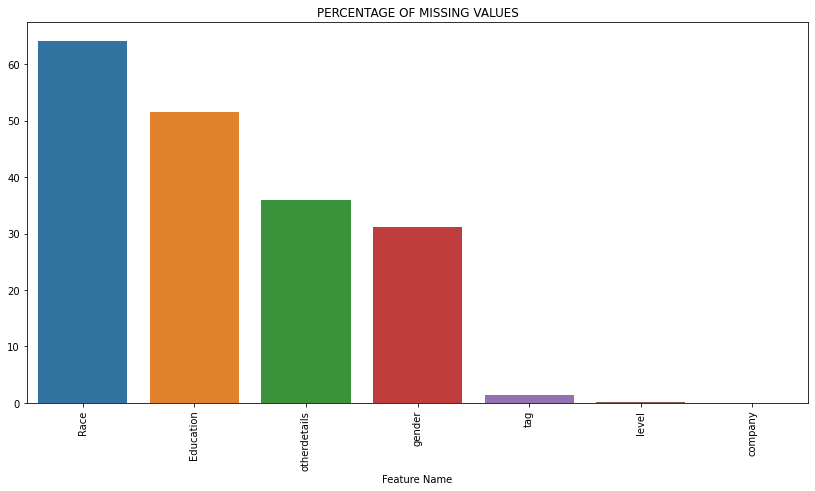

In [310]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Feature Name")
plt.title('PERCENTAGE OF MISSING VALUES')
sns.barplot(x=nullNames,y=percentage)
plt.show()

In [311]:
# list of columns to be dropped 
droppedColumns = ['otherdetails','gender','Race','Education']
sd= df.drop(droppedColumns,axis=1)

In [312]:
# Dropping rows containing null values
newSD= sd.dropna()

### Current Length of the Dataset  = 61665

In [313]:
#The current length of the data 
len(newSD)

61665

In [314]:
# confirming that there are no nul values in the dataset 
newSD.isnull().sum()

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
cityid                     0
dmaid                      0
rowNumber                  0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
dtype: int64

#### After dealing with null values we have a total of 61665 rows of data  and 25 columns 

# Checking the data type of each feature
There are 6 features that have object values
I then checked how many unique values each feature has.
99% of the timestamp feature is unique. To fix this i changed the timestamp to just the year this reduced the uniqueness drastically
The  features will be encoded into numerical form

In [315]:
newSD.dtypes

timestamp                   object
company                     object
level                       object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
cityid                       int64
dmaid                      float64
rowNumber                    int64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
dtype: object

In [316]:
#newSD.dtypes.value_counts()
#ax=plt.subplots(1,1,figsize=(10,8))


In [317]:
# checking the percentage of unique values
len(newSD['timestamp'].unique())*100/len(newSD)


99.86864509851618

In [318]:
len(newSD['company'].unique())*100/len(newSD)

2.6352063569285655

In [319]:
len(newSD['level'].unique())*100/len(newSD)

4.689856482607638

In [320]:
len(newSD['title'].unique())**100/len(newSD)

6.593062150899461e+112

In [321]:
len(newSD['location'].unique())*100/len(newSD)

1.7027487229384577

In [322]:
len(newSD['tag'].unique())*100/len(newSD)

4.950944620124869

In [323]:
# view of the original layout of the timestamp
newSD["timestamp"]

409       6/3/2018 13:58:20
410        6/4/2018 0:16:01
411       6/4/2018 19:56:27
412       6/4/2018 20:27:58
413       6/5/2018 12:44:52
                ...        
62637     9/9/2018 11:52:32
62638     9/13/2018 8:23:32
62639    9/13/2018 14:35:59
62640    9/16/2018 16:10:35
62641     1/29/2019 5:12:59
Name: timestamp, Length: 61665, dtype: object

In [324]:
# converting the timestamp to dtype to datetime64
newSD["timestamp"] = pd.to_datetime(newSD["timestamp"])
newSD['timestamp']

/var/folders/n9/4_6jg2qd0214yfgxv1zfhkpr0000gn/T/ipykernel_43080/2341665655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newSD["timestamp"] = pd.to_datetime(newSD["timestamp"])


409     2018-06-03 13:58:20
410     2018-06-04 00:16:01
411     2018-06-04 19:56:27
412     2018-06-04 20:27:58
413     2018-06-05 12:44:52
                ...        
62637   2018-09-09 11:52:32
62638   2018-09-13 08:23:32
62639   2018-09-13 14:35:59
62640   2018-09-16 16:10:35
62641   2019-01-29 05:12:59
Name: timestamp, Length: 61665, dtype: datetime64[ns]

In [325]:
# Stroe timestamp in a dummy variable 
timecopy = newSD["timestamp"]
# For each time stamp store the time stamp as the year 
for i in range(len(timecopy)):
    timecopy.iloc[i]= timecopy.iloc[i].year

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [326]:
timecopy

409      2018
410      2018
411      2018
412      2018
413      2018
         ... 
62637    2018
62638    2018
62639    2018
62640    2018
62641    2019
Name: timestamp, Length: 61665, dtype: object

In [327]:
# Replace timestamps in dataset with sleaned timestamps
for i in range(len(timecopy)):
    newSD["timestamp"][i]= timecopy.iloc[i]

/var/folders/n9/4_6jg2qd0214yfgxv1zfhkpr0000gn/T/ipykernel_43080/1869529699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newSD["timestamp"][i]= timecopy.iloc[i]
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


In [328]:
len(newSD['timestamp'].unique())*100/len(newSD)

0.0064866618016703155

# Encoding 


In [329]:
le_company = LabelEncoder()
newSD['company']= newSD[['company']].apply(le_company.fit_transform)
le_level = LabelEncoder()
newSD['level']= newSD[['level']].apply(le_level.fit_transform)
le_title = LabelEncoder()
newSD['title']= newSD[['title']].apply(le_title.fit_transform)
le_location = LabelEncoder()
newSD['location']= newSD[['location']].apply(le_location.fit_transform)
le_tag = LabelEncoder()
newSD['tag']= newSD[['tag']].apply(le_tag.fit_transform)
le_time = LabelEncoder()
newSD['timestamp']= newSD[['timestamp']].apply(le_time.fit_transform)

/var/folders/n9/4_6jg2qd0214yfgxv1zfhkpr0000gn/T/ipykernel_43080/2852971600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newSD['company']= newSD[['company']].apply(le_company.fit_transform)
/var/folders/n9/4_6jg2qd0214yfgxv1zfhkpr0000gn/T/ipykernel_43080/2852971600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newSD['level']= newSD[['level']].apply(le_level.fit_transform)
/var/folders/n9/4_6jg2qd0214yfgxv1zfhkpr0000gn/T/ipykernel_43080/2852971600.py:6: SettingWithCopyWarning: 
A value is trying

In [330]:
newSD.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
409,0,1358,921,11,160500,908,0.58,0.58,1069,128000.0,...,0,0,0,0,0,0,0,0,0,0
410,0,919,1293,12,340000,767,16.00,15.00,827,206000.0,...,0,0,0,0,0,0,0,0,0,0
411,0,988,2076,11,240000,838,15.00,6.00,895,0.0,...,0,0,0,0,0,0,0,0,0,0
412,0,1128,1458,11,160000,858,5.00,3.00,1069,0.0,...,0,0,0,0,0,0,0,0,0,0
413,0,556,1084,11,208000,609,0.00,0.00,827,116000.0,...,0,0,0,0,0,0,0,0,0,0


# Feature Correlation
Using a heat map, i checked the correlation between all the features in the data set. This is to make sure no two or more features have the same value.

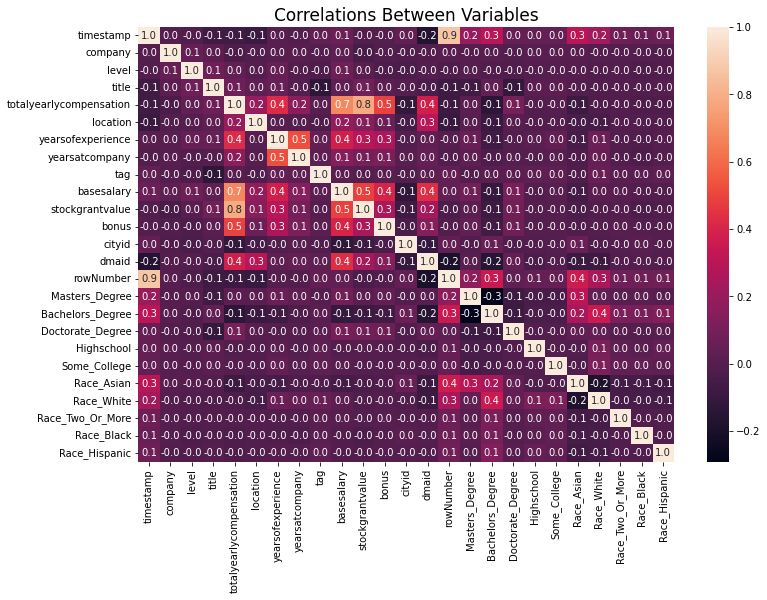

In [331]:
plt.figure(figsize=(12,8))
sns.heatmap(newSD.corr(),annot = True,fmt='.1f')
plt.title("Correlations Between Variables", size=17)
plt.show()

# Dataset Target 
The target for this data set is the total yearly compensation. The total yearly compensation for the dataset ranges from 10,000 to 4,980,000. Due to the wide range of values I mapped the total compensenstion using the Interquartile range. total yearly compensation now  ranges from 0 to 6

In [332]:
print(max(newSD['totalyearlycompensation']))
print(min(newSD['totalyearlycompensation']))

4980000
10000


In [333]:
newSD['totalyearlycompensation'].describe()

count    6.166500e+04
mean     2.158647e+05
std      1.379557e+05
min      1.000000e+04
25%      1.350000e+05
50%      1.880000e+05
75%      2.630000e+05
max      4.980000e+06
Name: totalyearlycompensation, dtype: float64

In [334]:
newSD.loc[newSD['totalyearlycompensation']<=67500,'totalyearlycompensation']=0
newSD.loc[(newSD['totalyearlycompensation']>67500)&(newSD['totalyearlycompensation']<=135000),'totalyearlycompensation']=1
newSD.loc[(newSD['totalyearlycompensation']>135000)&(newSD['totalyearlycompensation']<=188000),'totalyearlycompensation']=2
newSD.loc[(newSD['totalyearlycompensation']>188000)&(newSD['totalyearlycompensation']<=263000),'totalyearlycompensation']=3
newSD.loc[(newSD['totalyearlycompensation']>236000)&(newSD['totalyearlycompensation']<=1236000),'totalyearlycompensation']=4
newSD.loc[newSD['totalyearlycompensation']> 1236000,'totalyearlycompensation']=5


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [335]:
newSD.head()


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
409,0,1358,921,11,2,908,0.58,0.58,1069,128000.0,...,0,0,0,0,0,0,0,0,0,0
410,0,919,1293,12,4,767,16.00,15.00,827,206000.0,...,0,0,0,0,0,0,0,0,0,0
411,0,988,2076,11,3,838,15.00,6.00,895,0.0,...,0,0,0,0,0,0,0,0,0,0
412,0,1128,1458,11,2,858,5.00,3.00,1069,0.0,...,0,0,0,0,0,0,0,0,0,0
413,0,556,1084,11,3,609,0.00,0.00,827,116000.0,...,0,0,0,0,0,0,0,0,0,0


I seperated the target from the dataset.I also dropped 3 columns because of the high correlation to the target. I wanted to test The accuracy in the absence of these columns 

In [336]:
# seperating the target from the features
target = newSD.totalyearlycompensation
del newSD['totalyearlycompensation']
print(len(target),len(newSD))
droppedColumns = ['basesalary','stockgrantvalue','rowNumber']
sd= newSD.drop(droppedColumns,axis=1)

61665 61665


# Splitting the Data to 70% train and 30% test

In [337]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(newSD,target,train_size=0.7)




In [388]:
classifiers= ['DecisionTree','KNN','NaiveBayes','SVM','VotingEnsamble']
asc  = []

# Decision Tree Classifier
The decision tree classifier with the entropy as its criterion yielded and accuracy of 94%

In [389]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',splitter='best')
modeldt = dt.fit(x_train,y_train)
predictiondt = modeldt.predict(x_test)
asc.append(accuracy_score(y_test,predictiondt))

<AxesSubplot:>

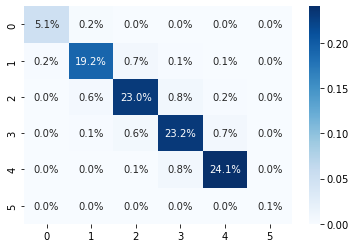

In [339]:
confusionMatrix = confusion_matrix(y_test,predictiondt)
confusionMatrix
sns.heatmap(confusionMatrix/np.sum(confusionMatrix),annot=True,fmt = '.1%',cmap = 'Blues')

# K Nearest Neighbors 
This algorithim with and n value of 10 yielded an accuracy of 94 percent

In [390]:
 from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 10)
model_kn = kn.fit(x_train,y_train)
prediction_kn = model_kn.predict(x_test)
asc.append(accuracy_score(y_test,prediction_kn))

<AxesSubplot:>

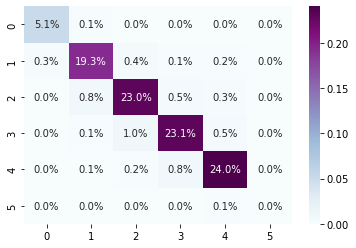

In [341]:
confusionMatrix = confusion_matrix(y_test,prediction_kn)
confusionMatrix
sns.heatmap(confusionMatrix/np.sum(confusionMatrix),annot=True,fmt = '.1%',cmap = 'BuPu')

# Naive Bayes Algorithm 
The naive bayes yielded an accuracy of 75% which is the lowest accuracy 

In [391]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model_nb= nb.fit(x_train,y_train)
prediction_nb= model_nb.predict(x_test)
asc.append(accuracy_score(y_test,prediction_nb))

<AxesSubplot:>

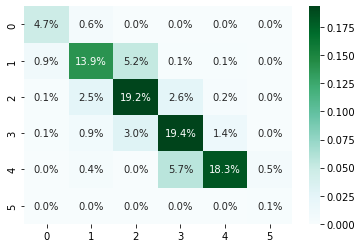

In [344]:
confusionMatrix = confusion_matrix(y_test,prediction_nb)
confusionMatrix
sns.heatmap(confusionMatrix/np.sum(confusionMatrix),annot=True,fmt = '.1%',cmap = 'BuGn')

# Support Vector Machine Classifier 
The support vector machine yielded an accuracy of 95 percent

In [392]:
from sklearn.svm import SVC
sv = SVC()
model_sv = sv.fit(x_train,y_train)
prediction_sv = model_sv.predict(x_test)
asc.append(accuracy_score(y_test,prediction_sv))

<AxesSubplot:>

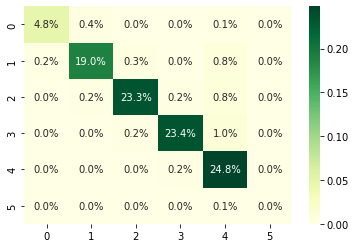

In [348]:
confusionMatrix = confusion_matrix(y_test,prediction_sv)
confusionMatrix
sns.heatmap(confusionMatrix/np.sum(confusionMatrix),annot=True,fmt = '.1%',cmap = 'YlGn')

# Random Forest Classfier
Using 100 decision trees and entropy criterion.
This classifier has an accuracy of 94 percent accuracy 

In [349]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy')
model = rf.fit(x_train,y_train)
prediction= model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.9408108108108109

<AxesSubplot:>

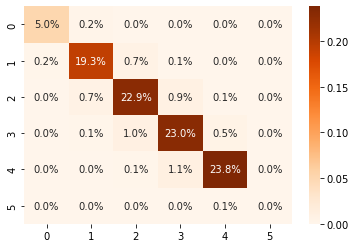

In [350]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test,prediction)
confusionMatrix
sns.heatmap(confusionMatrix/np.sum(confusionMatrix),annot=True,fmt = '.1%',cmap = 'Oranges')

# AdaBosting Classifier 
I decided to use the adaboost classifer  for the naive bayes classifer to help improve the accuracy. 
The adaboost yielded an accuracy of 79% which is higher than the accuracy of the naive bayes

In [369]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=15,base_estimator= nb,
                         learning_rate=0.25,algorithm = 'SAMME')
abc.fit(x_train,y_train)
predictionabc =abc.predict(x_test)
accuracy_score(y_test,predictionabc)

0.7917297297297298

<AxesSubplot:>

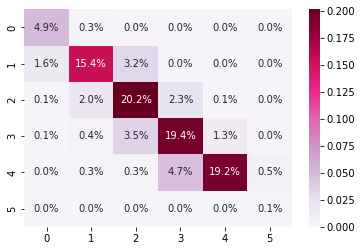

In [372]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test,predictionabc)
confusionMatrix
sns.heatmap(confusionMatrix/np.sum(confusionMatrix),annot=True,fmt = '.1%',cmap = 'PuRd')

# Voting Classifier
The  accuracy of Voting based classifier is  aproximately 96 percent. There was a slight increase in the accuracy.

In [393]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = [('dt',dt),('kn',kn),('nb',nb),('sv',sv),('rf',rf)],weights=[2,2,1,3,2])
model_vc = vc.fit(x_train,y_train)
prediction_vc = model_vc.predict(x_test)
asc.append(accuracy_score(y_test,prediction_vc))


<AxesSubplot:>

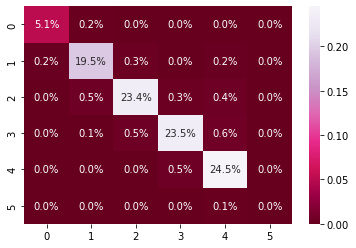

In [377]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test,prediction_vc)
confusionMatrix
sns.heatmap(confusionMatrix/np.sum(confusionMatrix),annot=True,fmt = '.1%',cmap = 'PuRd_r')

# Multi-Layer Perceptron network 
I attempted to use the multi-layer perceptron neural network for  my project and it yielded an accuracy of 84 percent 

In [380]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes = (100,100,50),max_iter = 300,activation = 'relu',solver='adam',random_state =1)
model_nn = nn.fit(x_train,y_train)
prediction_nn = model_nn.predict(x_test)
accuracy_score(y_test,prediction_nn)


0.8422162162162162

## Comparing the four classifiers with the Voting ensemble accuracy 

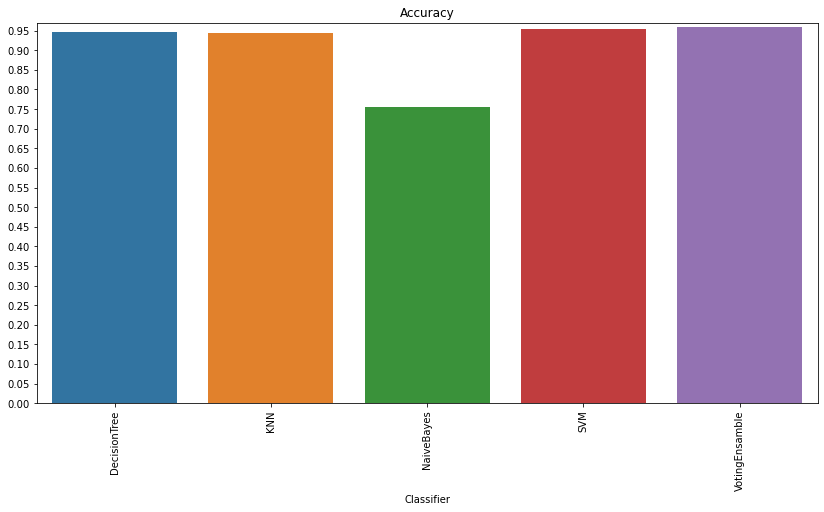

In [403]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Classifier")
plt.title('Accuracy')
sns.barplot(x=classifiers,y=asc)
ax=plt.gca()
ax.locator_params('y', nbins=25)
plt.ylim(0,0.97)
plt.show()

In [404]:
nbList = []
nbList.append(asc[2])
nbList.append(accuracy_score(y_test,predictionabc))

## Comparing the accuracy of the Naive Bayes to the ADABOOST

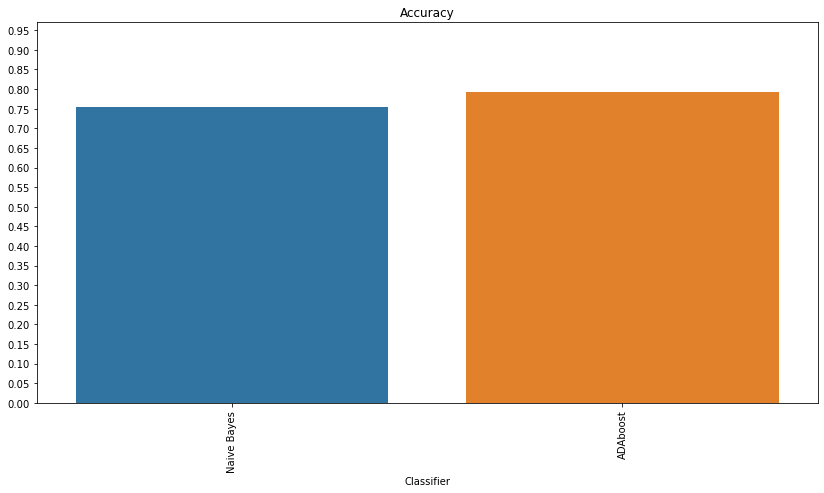

In [406]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Classifier")
plt.title('Accuracy')
sns.barplot(x=['Naive Bayes','ADAboost'],y=nbList)
ax=plt.gca()
ax.locator_params('y', nbins=25)
plt.ylim(0,0.97)
plt.show()

Overall the accuracy  was high with the highest being 96 and the lowest 75